<a href="https://colab.research.google.com/github/andimuhagung/skripsi/blob/main/kopi_Roasted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1FrGj3aqEGpD7_6p2vzRJQM2Bg3ezBl67' -O 'Roastedbaru.xlsx'

--2023-07-24 04:11:41--  https://drive.google.com/uc?export=download&id=1FrGj3aqEGpD7_6p2vzRJQM2Bg3ezBl67
Resolving drive.google.com (drive.google.com)... 173.194.217.139, 173.194.217.101, 173.194.217.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6s4qe202j3ka250kqb546d8nufolfkcs/1690171875000/10842872470776738560/*/1FrGj3aqEGpD7_6p2vzRJQM2Bg3ezBl67?e=download&uuid=5fb7271b-8c15-41f9-8f5d-311767e59e76 [following]
--2023-07-24 04:11:42--  https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6s4qe202j3ka250kqb546d8nufolfkcs/1690171875000/10842872470776738560/*/1FrGj3aqEGpD7_6p2vzRJQM2Bg3ezBl67?e=download&uuid=5fb7271b-8c15-41f9-8f5d-311767e59e76
Resolving doc-04-7k-docs.googleusercontent.com (doc-04-7k-docs.googleusercontent.com)... 173.194.213.132, 

In [ ]:
#Loading Dataset
data = pd.read_excel("Roastedbaru.xlsx")
data

,MQ2,MQ5,MQ135,Label
0,413,193,157,0
1,414,192,143,0
2,415,192,145,0
3,416,192,145,0
4,417,192,149,0
...,...,...,...,...
895,223,116,594,2
896,228,122,236,2
897,221,116,189,2
898,222,115,220,2


In [ ]:
data['Label']=data['Label'].replace([0,1,2],['Light','Medium','Dark'])

In [ ]:
data

,MQ2,MQ5,MQ135,Label
0,413,193,157,Light
1,414,192,143,Light
2,415,192,145,Light
3,416,192,145,Light
4,417,192,149,Light
...,...,...,...,...
895,223,116,594,Dark
896,228,122,236,Dark
897,221,116,189,Dark
898,222,115,220,Dark


<Axes: xlabel='Label', ylabel='MQ2'>

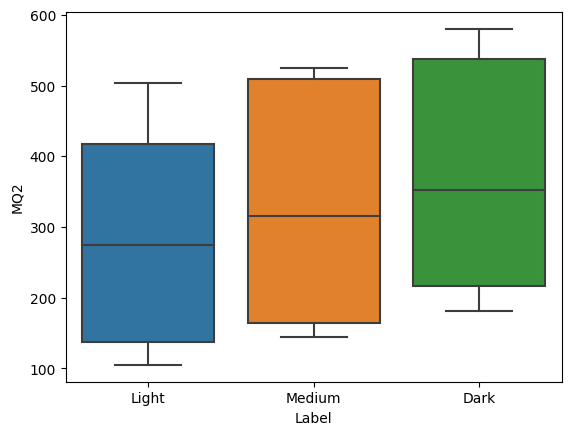

In [ ]:
sns.boxplot(x='Label', y='MQ2', data=data)

<Axes: xlabel='Label', ylabel='MQ5'>

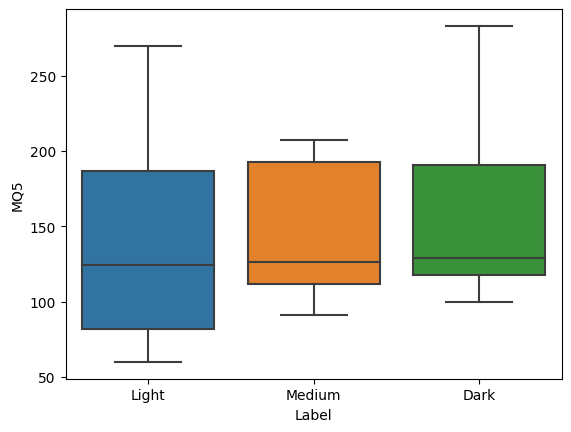

In [ ]:
sns.boxplot(x='Label', y='MQ5', data=data)

<Axes: xlabel='Label', ylabel='MQ135'>

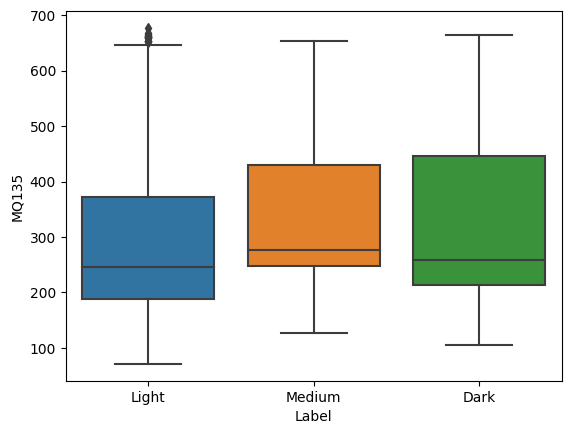

In [ ]:
sns.boxplot(x='Label', y='MQ135', data=data)

array([[<Axes: title={'center': 'MQ2'}>, <Axes: title={'center': 'MQ5'}>],
       [<Axes: title={'center': 'MQ135'}>, <Axes: >]], dtype=object)

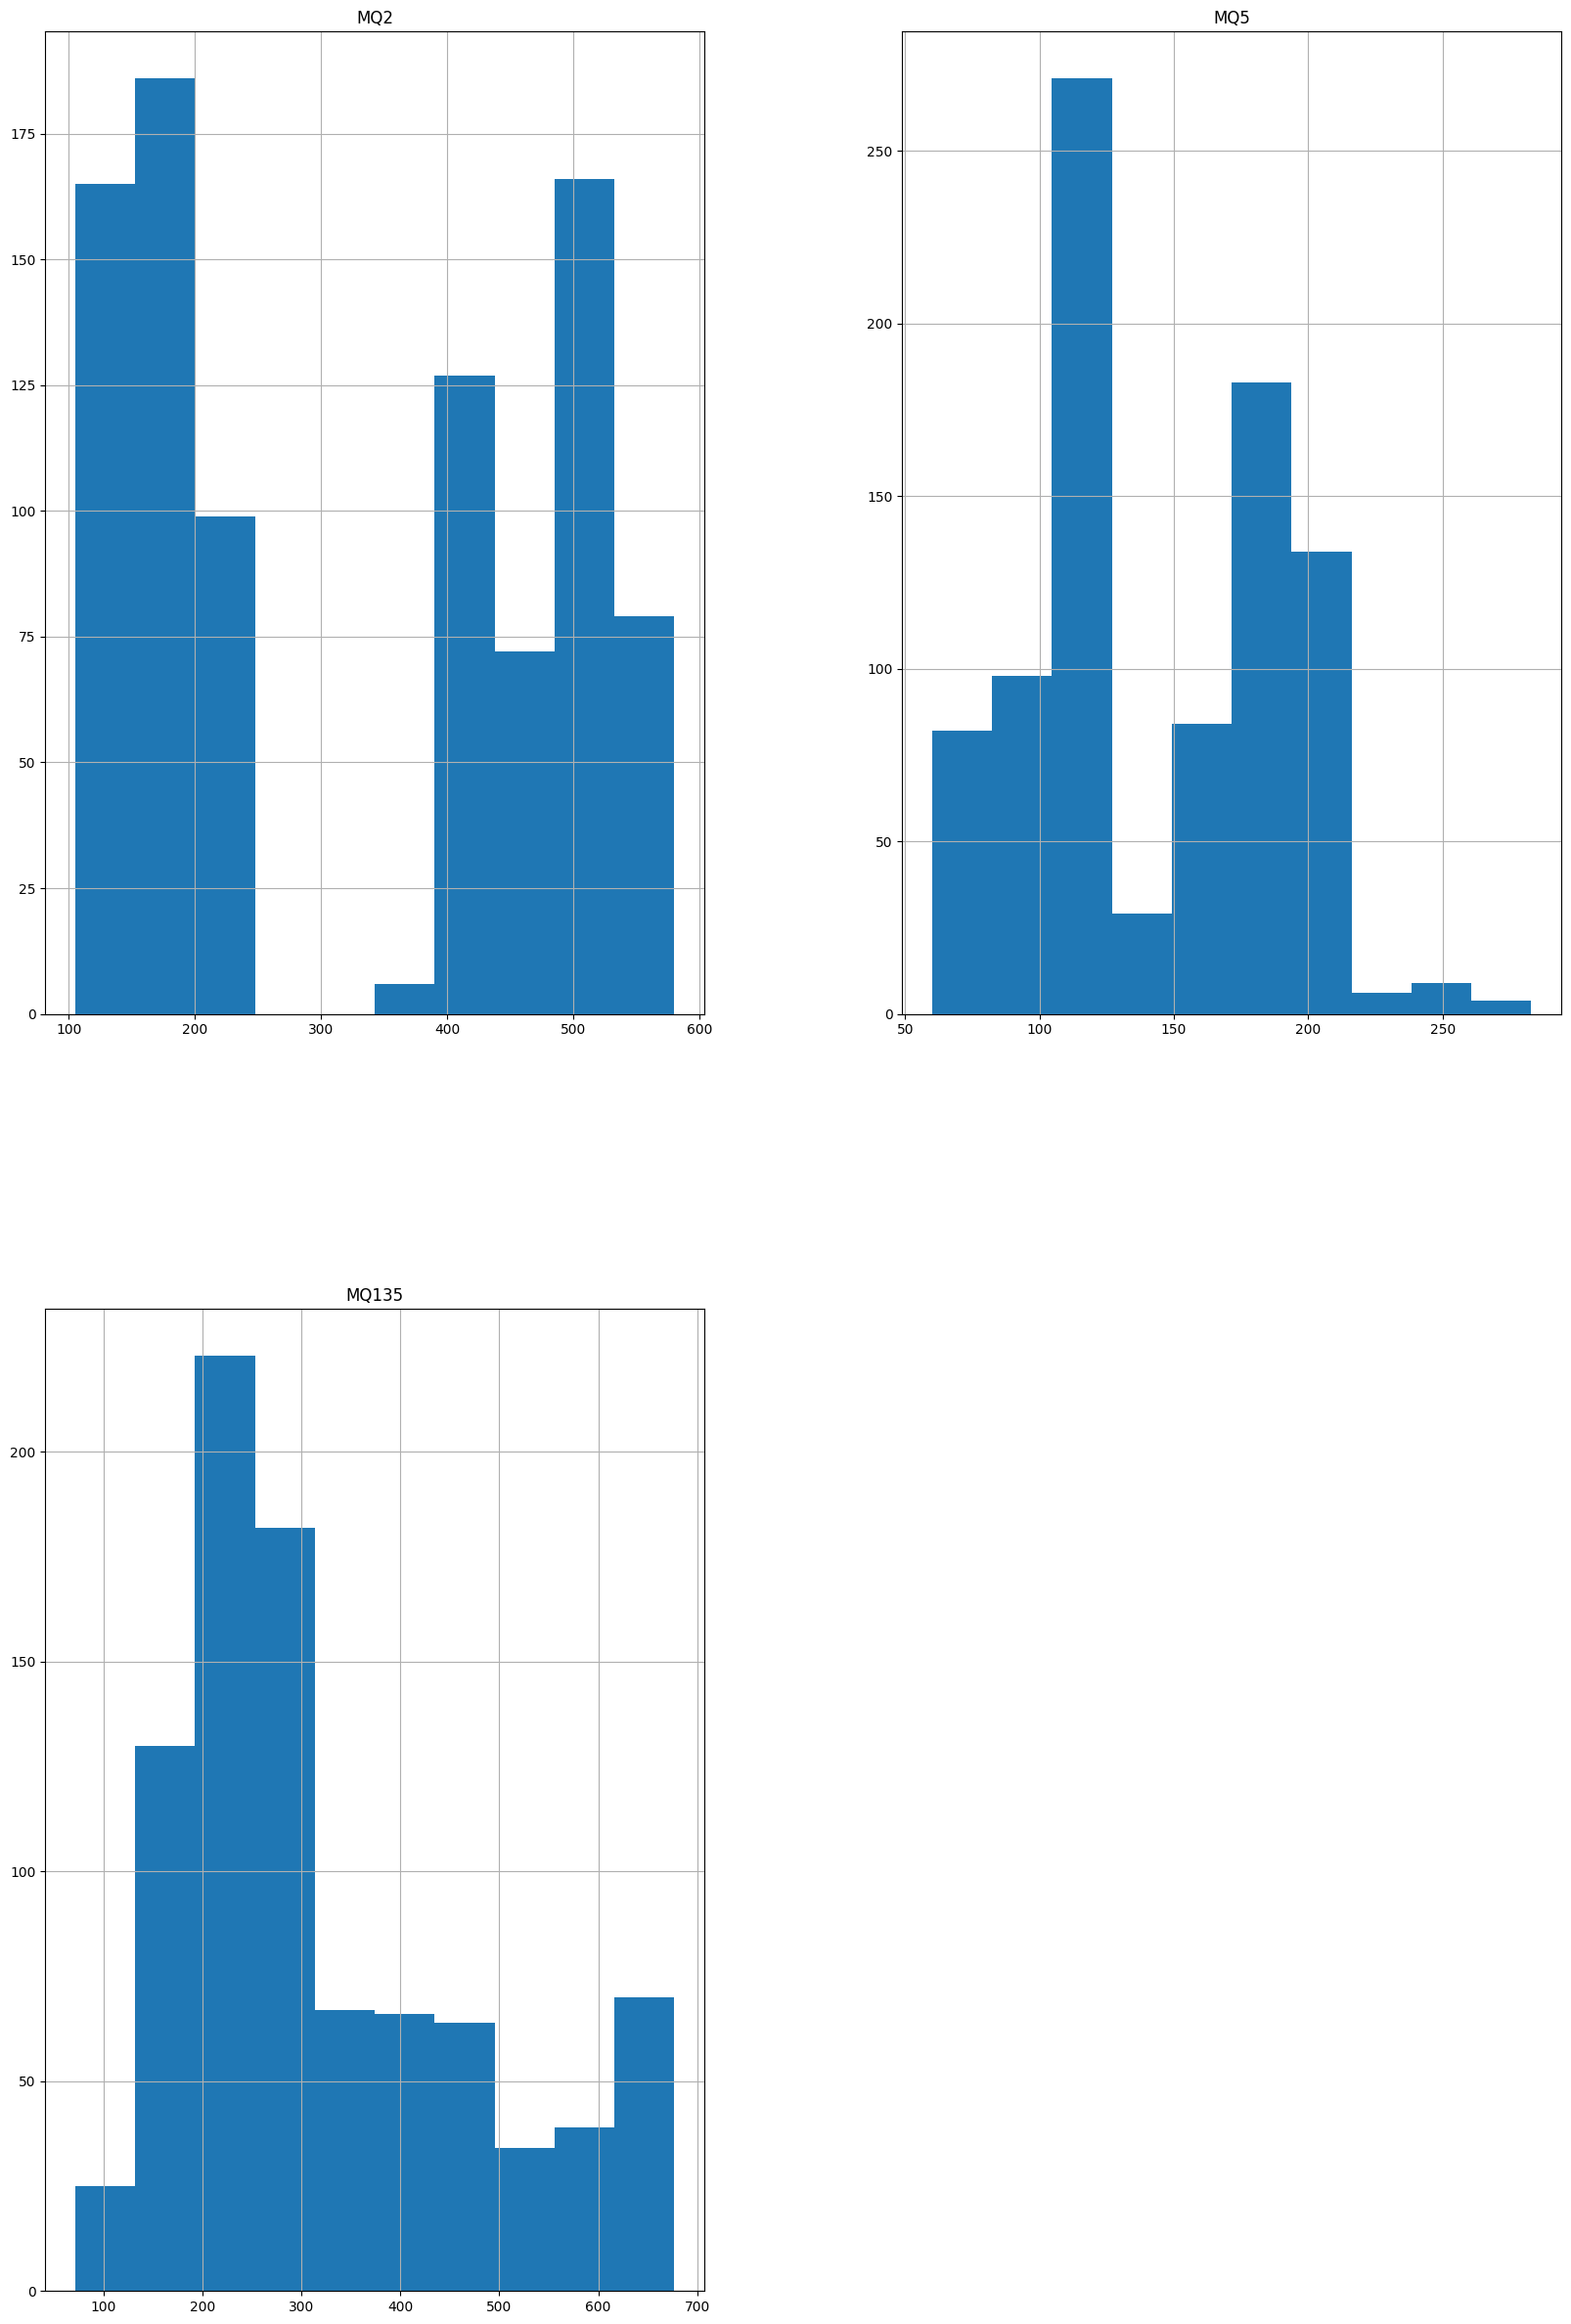

In [ ]:
data.hist(figsize=(20,30))

In [ ]:
X=data.drop('Label', axis=1)
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
Y

array(['Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Lig

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [ ]:
dummy_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
#Splitting dataset into training and testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,dummy_y,test_size=0.2,random_state=0)

#Performing Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=12,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=3,activation="softmax"))
#Compiling ANN
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=64,epochs = 2000)

Epoch 1/2000
12/12 [==============================] - 1s 2ms/step - loss: 71.2454 - accuracy: 0.3347
Epoch 2/2000
12/12 [==============================] - 0s 2ms/step - loss: 49.4046 - accuracy: 0.3347
Epoch 3/2000
12/12 [==============================] - 0s 3ms/step - loss: 32.4598 - accuracy: 0.3319
Epoch 4/2000
12/12 [==============================] - 0s 3ms/step - loss: 25.3018 - accuracy: 0.4125
Epoch 5/2000
12/12 [==============================] - 0s 3ms/step - loss: 20.3477 - accuracy: 0.3903
Epoch 6/2000
12/12 [==============================] - 0s 2ms/step - loss: 16.0697 - accuracy: 0.3736
Epoch 7/2000
12/12 [==============================] - 0s 2ms/step - loss: 12.3079 - accuracy: 0.4681
Epoch 8/2000
12/12 [==============================] - 0s 3ms/step - loss: 8.8123 - accuracy: 0.4278
Epoch 9/2000
12/12 [==============================] - 0s 2ms/step - loss: 5.3348 - accuracy: 0.4625
Epoch 10/2000
12/12 [==============================] - 0s 3ms/step - loss: 2.6623 - accuracy:

In [ ]:
y_pred = ann.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

6/6 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 86.66666666666667


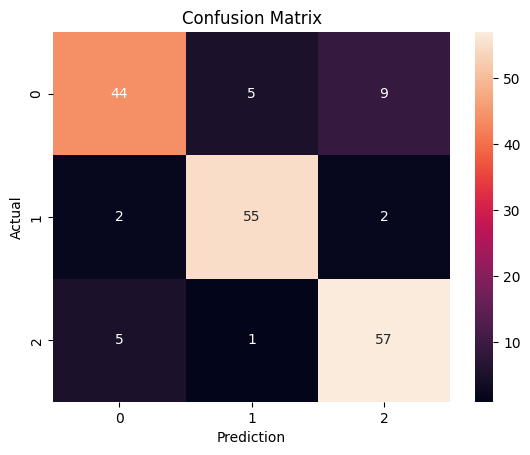

In [ ]:
cm = confusion_matrix(test, pred)
sns.heatmap(cm, annot=True, fmt='d') # annot=True : memunculkan angka pada heatmap, fmt='d' : mengubah scientific notation menjadi digit saja
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()